# Word embeddings with Word2Vec

- Implementing CBOW (continuous bag of words), since it's reccomended for larger datasets
- Goal: Use word embeddings to make sentiment analysis more meaningful and to be able to compare news sources text better
-> not clear yet: how exactly do i use the word embeddings for sentiment analysis if I dont have any measure to train the model with (like ratings or something similar)?

Theory behind Word embeddings and how to generate them:
https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa 
https://medium.com/analytics-vidhya/word2vector-using-gensim-e055d35f1cb4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
from gensim.models import Word2Vec

source_colors = list(sns.color_palette('colorblind'))
#load pandas dataframe from sentiment_analysis.csv
df = pd.read_csv('Data/sentiment_analysis.csv')
df

,Unnamed: 0,source,date,title,words,body,tokenized_text,neg,neu,pos,compound,sentiment
0,51,The New York Times,2019-04-08,9 Hong Kong Democracy Advocates Convicted for ...,932,\nHONG KONG — Nine democracy activists on Tues...,hong kong nine democracy activists tuesday con...,0.138,0.751,0.112,-0.8622,negative
1,387,South China Morning Post,2019-05-16,Six activists found guilty over liaison office...,384,\nSix pro-democracy activists were yesterday f...,six prodemocracy activists yesterday found gui...,0.169,0.756,0.075,-0.9552,negative
2,271,South China Morning Post,2019-06-10,SOLIDARITY AND DEFIANCE Organisers say more th...,951,\nProtesters of all ages and from all walks of...,protesters ages walks life flooded streets hon...,0.119,0.799,0.082,-0.9612,negative
3,173,The New York Times,2019-06-11,"Bricks, Bottles and Tear Gas_ Protesters and P...",1661,\nRiot police turned downtown Hong Kong into a...,riot police turned downtown hong kong teargasf...,0.192,0.714,0.094,-0.9983,negative
4,276,South China Morning Post,2019-06-11,"Police faced 'organised, armed and prepared ra...",887,"\nOrganised, prepared, armed and radical - tha...",organised prepared armed radical police descri...,0.176,0.755,0.068,-0.9939,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,The New York Times,2019-11-29,Hong Kong Police End 2-Week Campus Siege,834,\nThe police found no protesters during a fina...,police found protesters final search polytechn...,0.216,0.709,0.076,-0.9965,negative
396,207,South China Morning Post,2019-11-29,Inside the siege of Polytechnic University Aft...,2383,"\nOn November 21, James Wong made his dash for...",november james wong made dash freedom wreckage...,0.202,0.734,0.064,-0.9996,negative
397,84,The New York Times,2019-11-30,"In Hong Kong , Campus Siege Comes to End 2 Wee...",807,\nThe police found no protesters during a fina...,police found protesters final search polytechn...,0.208,0.718,0.074,-0.9963,negative
398,206,South China Morning Post,2019-12-01,Tensions return to streets ahead of major rall...,764,\nTension returned to Hong Kong's streets last...,tension returned hong kong streets last night ...,0.145,0.730,0.124,-0.6249,negative


In [3]:
# Create CBOW model
from unittest import skip
# apply gensim utils simple_preprocess to df['tokenized_text'] for all rows where df['source'] == 'The New York Times', save as data
data_nyt = df[df['source'] == 'The New York Times']['tokenized_text'].apply(gensim.utils.simple_preprocess)
data_scmp = df[df['source'] == 'South China Morning Post']['tokenized_text'].apply(gensim.utils.simple_preprocess).reset_index(drop=True)

data= df['tokenized_text'].apply(gensim.utils.simple_preprocess)
print(data)
model1 = gensim.models.Word2Vec(data_nyt, min_count = 2, workers= 4,
                              vector_size = 100, window = 5)

0      [hong, kong, nine, democracy, activists, tuesd...
1      [six, prodemocracy, activists, yesterday, foun...
2      [protesters, ages, walks, life, flooded, stree...
3      [riot, police, turned, downtown, hong, kong, t...
4      [organised, prepared, armed, radical, police, ...
                             ...                        
395    [police, found, protesters, final, search, pol...
396    [november, james, wong, made, dash, freedom, w...
397    [police, found, protesters, final, search, pol...
398    [tension, returned, hong, kong, streets, last,...
399    [week, relative, calm, vote, boosted, proteste...
Name: tokenized_text, Length: 400, dtype: object


In [4]:
#model with window of 10 -> how to check what is the best window size?
model2= gensim.models.Word2Vec(window = 5, min_count = 2, workers= 4)
model2.build_vocab(data_scmp, progress_per=1000)
model2.train(data, total_examples=model2.corpus_count, epochs=model2.epochs)

(848146, 1028390)

In [5]:
# Print some results
print("Cosine similarity between 'protest' " +
               "and 'demonstration' - CBOW : ",
    model2.wv.similarity('protest', 'demonstration'))
     
print("Cosine similarity between 'students' " +
                 "and 'peaceful' - CBOW : ",
      model1.wv.similarity('students', 'peaceful'))

Cosine similarity between 'protest' and 'demonstration' - CBOW :  0.9624982
Cosine similarity between 'students' and 'peaceful' - CBOW :  0.9944283


In [6]:
model2.wv.most_similar('police')

[('riot', 0.992672860622406),
 ('spray', 0.9922090768814087),
 ('pepper', 0.9916774034500122),
 ('rounds', 0.9907054305076599),
 ('beanbag', 0.990608811378479),
 ('bullets', 0.9881932735443115),
 ('fired', 0.988121747970581),
 ('batons', 0.9873182773590088),
 ('rubber', 0.9867775440216064),
 ('officers', 0.9849811792373657)]

In [7]:
model1.wv.most_similar('police')

[('riot', 0.9974842071533203),
 ('officers', 0.9960651993751526),
 ('clashed', 0.9954067468643188),
 ('standoffs', 0.9931384921073914),
 ('cannons', 0.9927316904067993),
 ('deployed', 0.9904991388320923),
 ('batons', 0.9898474812507629),
 ('rounds', 0.9896270036697388),
 ('bullets', 0.9888651371002197),
 ('pepper', 0.9885427951812744)]

In [8]:
#comparing it to skip gram model:
model3 = gensim.models.Word2Vec(data_nyt, min_count = 2, vector_size = 100,
                                             window = 5, sg = 1)
model4 = gensim.models.Word2Vec(data_scmp, min_count = 2, vector_size = 100,
                                             window = 5, sg = 1)

In [9]:
model3.wv.most_similar('police')

[('protesters', 0.8143801689147949),
 ('excessive', 0.8129822015762329),
 ('acted', 0.7724835276603699),
 ('rioting', 0.7714506983757019),
 ('setting', 0.7678629755973816),
 ('toward', 0.7676836252212524),
 ('minimum', 0.7650485634803772),
 ('restraint', 0.7627847194671631),
 ('use', 0.7612024545669556),
 ('range', 0.7611449956893921)]

In [10]:
model4.wv.most_similar('police')

[('using', 0.9366868734359741),
 ('excessive', 0.933371901512146),
 ('protesters', 0.9274675250053406),
 ('officers', 0.9204330444335938),
 ('crowds', 0.919069766998291),
 ('used', 0.9147062301635742),
 ('responded', 0.9143497943878174),
 ('injured', 0.9142767786979675),
 ('accused', 0.9089834094047546),
 ('weapons', 0.9075747132301331)]

## Embeddings with Doc2Vec

To compare whole articles, it is also possible to use Doc2Vec like so:
I just wanted to try it out here, but decided to not use it, since Word2Vec provides enough information for now

https://towardsdatascience.com/calculating-document-similarities-using-bert-and-other-models-b2c1a29c9630 

In [11]:
#helper function
def most_similar(df,doc_id,similarity_matrix,matrix):
    print (f'Document: {df.iloc[doc_id]["tokenized_text"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {df.iloc[ix]["tokenized_text"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [13]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(df['tokenized_text'])]
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/janawicklein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
for epoch in range(10): #epoch could be higher, this is just set low to save time when executing the whole notebook
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)

In [15]:
document_embeddings=np.zeros((df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]
    
    
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

print(pairwise_similarities.shape)

(400, 400)


/var/folders/zn/8nxtt6mn6x7422mthq8hmz4c0000gn/T/ipykernel_5686/4049369143.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  document_embeddings[i]=model_d2v.docvecs[i]


In [16]:
most_similar(df,0,pairwise_similarities,'Cosine Similarity')
most_similar(df,0,pairwise_differences,'Euclidean Distance')

Document: hong kong nine democracy activists tuesday convicted hong kong court public nuisance charges roles protest movement led monthslong occupation major intersections city five years ago activists face prison terms seven years protests became known umbrella movement galvanized city sought force hong kong top official step government accept democratic means elect future leaders protests formal leaders three people trial chu yiuming retired pastor two professors benny tai chan kinman founders occupy central love peace one main groups advocating civil disobedience demand changes hong kong electoral system three convicted conspiracy commit public nuisance mr tai mr chan also convicted incitement commit public nuisance convictions swiftly criticized hong kong democracy advocates human rights groups politicians united states britain time people would thought aim hong kong government bring whole community together seems appallingly divisive use anachronistic commonlaw charges vengeful pu

In [17]:
print(np.average(pairwise_similarities)) #to know the baseline similarity score
print(np.min(pairwise_similarities))
print(np.max(pairwise_similarities)) # 1.0: sign for duplicate articles in the data

0.2766591061680085
-0.10939836368473055
1.000000000000001


In [18]:
#better: use pre-trained model by GoogleNews trained on 100 billion words
model_pretrained = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

In [19]:
# Filter the list of vectors to include only those that Word2Vec has a vector for

vector_list= []
for item in data_nyt:
    for word in item:
        if word in model_pretrained.index_to_key:
            vector_list.append(model_pretrained[word])    


In [20]:
# Create a list of the words corresponding to these vectors
words_filtered = []
for item in data_nyt:
    for word in item:
        if word in  model_pretrained.index_to_key:
            words_filtered.append(word)

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df_pt = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df_pt.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
hong,-0.051270,0.188477,0.146484,-0.144531,-0.015564,-0.246094,0.136719,0.275391,0.060547,0.155273,...,0.184570,0.100586,0.306641,0.247070,0.031982,-0.328125,-0.410156,0.015015,-0.120605,0.380859
kong,0.083008,0.101562,0.178711,0.320312,0.279297,-0.289062,0.224609,0.353516,-0.080566,0.025146,...,-0.216797,0.222656,0.089844,-0.075684,-0.111816,-0.153320,-0.433594,-0.008423,-0.046387,0.240234
nine,0.131836,-0.044434,-0.022583,0.062988,0.253906,-0.197266,-0.191406,-0.096680,0.179688,0.009949,...,-0.071777,0.077148,-0.098633,-0.090332,-0.164062,0.097168,0.008057,0.072754,-0.152344,-0.097656
democracy,0.112305,-0.061035,0.165039,0.566406,0.024658,-0.063477,0.110352,0.107422,0.093262,-0.002686,...,-0.408203,-0.660156,-0.127930,-0.227539,-0.170898,0.090820,0.175781,-0.158203,0.255859,0.192383
activists,0.203125,0.265625,0.013916,0.186523,0.013855,-0.296875,-0.285156,0.217773,-0.108887,-0.058350,...,0.236328,-0.213867,-0.122070,-0.012085,0.095703,-0.134766,-0.083984,-0.164062,0.170898,0.211914


In [21]:
df_pt.shape

(9449, 300)

## Visualise Word2Vec Vectors using TSNE

In [22]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df_pt)

/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


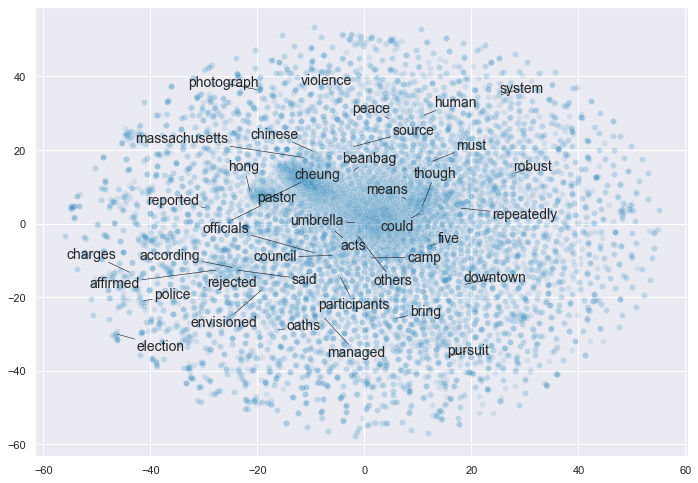

In [23]:
# First display all words as a scatter plot to test the t-SNE algorithm
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.1, color = source_colors[0])

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df_pt.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [24]:
#create average vector for articles to be able to compare them
nyt_vectors= []
for item in data_nyt:  
    doc = [word for word in item if word in model_pretrained.index_to_key]
    nyt_vectors.append(np.mean(model_pretrained[doc], axis=0))

/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


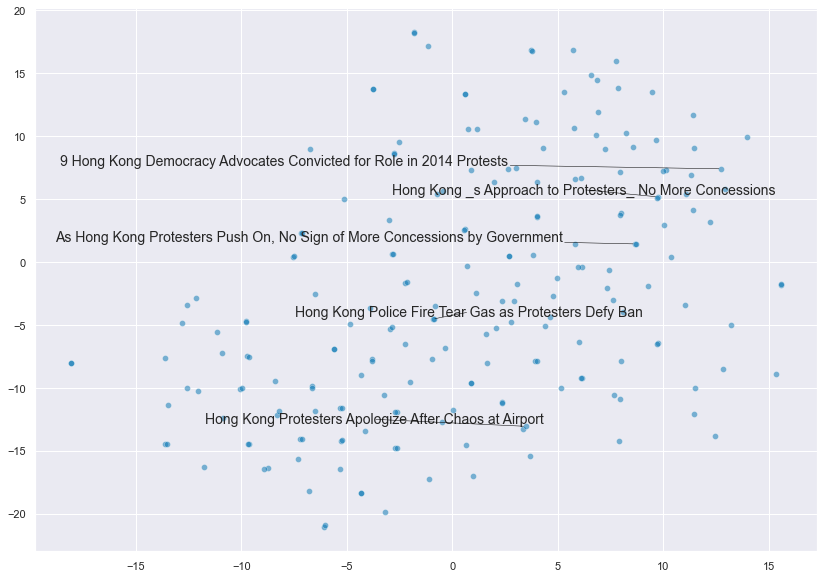

In [25]:
nyt_vectors = np.array(nyt_vectors)
nyt_titles = list(df[df['source'] == 'The New York Times']['title'])
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 30, n_iter = 5000)


tsne_df_nyt = tsne.fit_transform(nyt_vectors)
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df_nyt[:, 0], tsne_df_nyt[:, 1], alpha = 0.5, color = source_colors[0])

from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 200, 40)) # plots every 20th title in first 200 titles -> to reduce processing time, can be changed to plot more titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df_nyt[title, 0], tsne_df_nyt[title, 1], nyt_titles[title], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [27]:
#now the same for scmp articles to then compare them with nyt articles
scmp_vectors= []
for item in data_scmp:  
    doc = [word for word in item if word in model_pretrained.index_to_key]
    scmp_vectors.append(np.mean(model_pretrained[doc], axis=0))  

/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


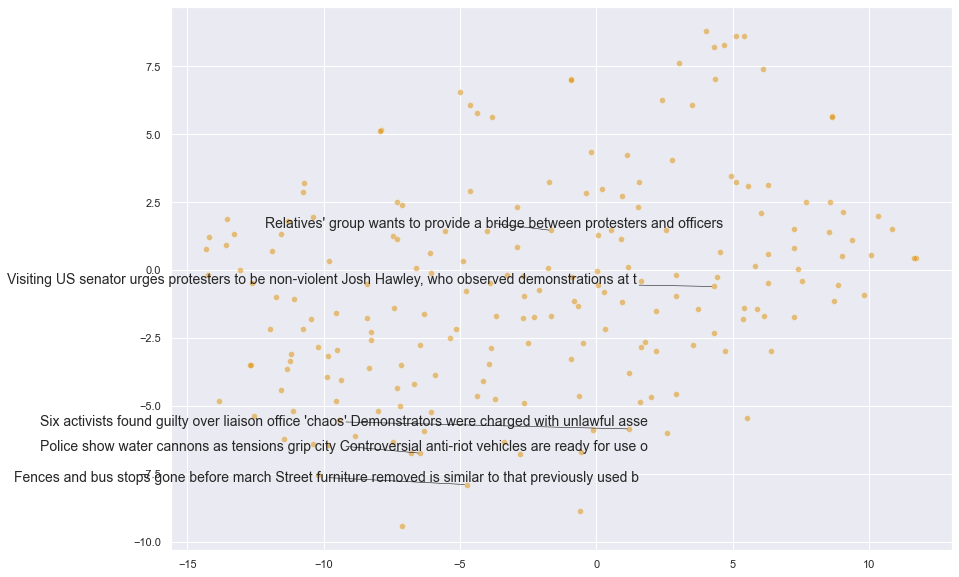

In [28]:
scmp_vectors = np.array(scmp_vectors)
scmp_titles = list(df[df['source'] == 'South China Morning Post']['title'])
scmp_sentiment = list(df[df['source'] == 'South China Morning Post']['compound'])
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 30, n_iter = 5000)


tsne_df_scmp = tsne.fit_transform(scmp_vectors)
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df_scmp[:, 0], tsne_df_scmp[:, 1], alpha = 0.5, color = source_colors[1])

from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 200, 40)) # plots every 20th title in first 200 titles -> to reduce processing time, can be changed to plot more titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df_scmp[title, 0], tsne_df_scmp[title, 1], scmp_titles[title], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


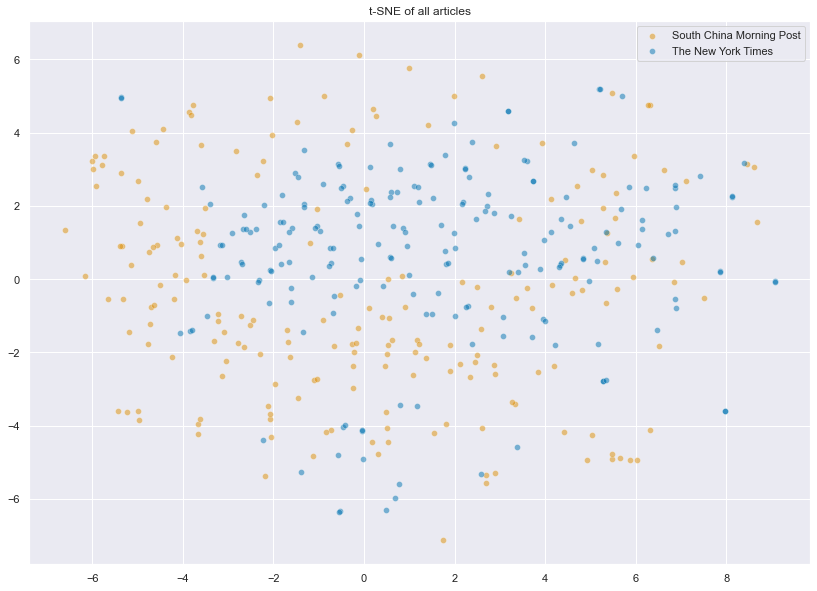

In [42]:
#merge both vector sets and then do the t-sne to be able to compare both sources
vectors_merged = np.concatenate((scmp_vectors, nyt_vectors), axis=0)
titles_merged = scmp_titles + nyt_titles

# Initialize t-SNE, try out different values for perplexity (between 0 and 100) and n_iter
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 90, n_iter = 5000, )

tsne_df = tsne.fit_transform(vectors_merged)
fig, ax = plt.subplots(figsize = (14, 10))
#sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5, color = source_colors[1]) #all the same colour
#colour the first 200 vectors in the scatterplot in vectors_merged yellow and the rest in nyt blue
sns.scatterplot(tsne_df[:200, 0], tsne_df[:200, 1], alpha = 0.5, color = source_colors[1])
sns.scatterplot(tsne_df[200:, 0], tsne_df[200:, 1], alpha = 0.5, color = source_colors[0])

texts = []
titles_to_plot = list(np.arange(0, 200, 41)) # plots every 20th title in first 200 titles -> to reduce processing time, can be changed to plot more titles

# Append words to list
# for title in titles_to_plot:
#     texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], scmp_titles[title], fontsize = 14))
#     texts.append(plt.text(tsne_df[title+200, 0], tsne_df[title+200, 1], nyt_titles[title], fontsize = 14))
    
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.title('t-SNE of all articles')
plt.legend(['South China Morning Post', 'The New York Times'])
plt.show()
